In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import networkx as nx

# Lectura de Datos

In [2]:
## lectura del grafo
G_TESIS = nx.read_graphml("g_tesis_weighted.graphml")
print(G_TESIS)

Graph with 15320 nodes and 278820 edges


## Grafo del 2022

In [3]:
nodos_2022 = [n for n, attr in G_TESIS.nodes(data=True) if attr['year'] == 2022]
print(nodos_2022[0:10])
len(nodos_2022)

['3161802', '3161807', '3161831', '3161822', '3161798', '3161846', '3161844', '3161860', '3161850', '3161820']


1235

In [4]:
SUB_G = G_TESIS.subgraph(nodos_2022)
print(SUB_G)
print(nx.is_connected(SUB_G))

Graph with 1235 nodes and 4110 edges
False


In [7]:
nx.number_connected_components(SUB_G)

407

## Componente Mayor

In [8]:
components = nx.connected_components(SUB_G)

d = {}
for c in components:
    d[len(c)] = c

print(d)
max(d.keys())

{1: {'3239810'}, 2: {'3356254', '3356467'}, 714: {'3101443', '3288382', '3121714', '3356427', '3276158', '3351449', '3347621', '3155905', '3328733', '3215787', '3206620', '3321006', '3206630', '3328107', '3217403', '3137319', '3206644', '3206697', '3356301', '3291015', '3161857', '3136209', '3121723', '3101388', '3322540', '3351468', '3306654', '3276862', '3327272', '3351430', '3276551', '3329016', '3206642', '3356380', '3111112', '3161809', '3326378', '3352514', '3121727', '3101408', '3369913', '3356293', '3326388', '3432135', '3136202', '3288352', '3356762', '3276864', '3335399', '3372055', '3399512', '3288368', '3074318', '3356473', '3328110', '3234556', '3368348', '3206682', '3291007', '3322550', '3356419', '3206626', '3351163', '3297591', '3356410', '3356379', '3411924', '3323510', '3288390', '3327277', '3353042', '3321005', '3276161', '3356432', '3324678', '3353043', '3101428', '3148063', '3356402', '3312325', '3356250', '3447664', '3136207', '3323825', '3227336', '3101460', '313

714

In [9]:
G_COMP_MAX = G_TESIS.subgraph(d[714])
print(G_COMP_MAX)

Graph with 714 nodes and 3962 edges


In [18]:
pos = nx.spring_layout(G_COMP_MAX, k=0.15, iterations=20)
pos_kamada = nx.kamada_kawai_layout(G_COMP_MAX)
print(pos)
len(pos)

{'3101443': array([-0.30850312,  0.00951146]), '3288382': array([ 0.1965037 , -0.43330374]), '3121714': array([-0.77919042, -0.1436023 ]), '3356427': array([0.12670651, 0.26971823]), '3276158': array([0.88225985, 0.61790293]), '3351449': array([-0.29602364,  0.31067273]), '3347621': array([-0.36480188,  0.36701077]), '3155905': array([0.3079364 , 0.21395861]), '3328733': array([ 0.34341487, -0.87061417]), '3215787': array([-0.50983876, -0.41809976]), '3206620': array([ 0.93661803, -0.2131158 ]), '3321006': array([-0.18327527, -0.7139039 ]), '3206630': array([-0.29706609, -0.46930262]), '3328107': array([-0.24759512,  0.36063561]), '3217403': array([-0.13276955,  0.02861398]), '3137319': array([-0.00322586,  0.4880268 ]), '3206644': array([0.29656041, 0.00325879]), '3206697': array([-0.83848041, -0.17743899]), '3356301': array([-0.43983537,  0.00990843]), '3291015': array([ 0.35999396, -0.40009385]), '3161857': array([-0.83677971, -0.09367068]), '3136209': array([-0.12286387,  0.5637719

714

Graph with 714 nodes and 3962 edges
---------------------------------------------------------------
Coeficiente de clustering: 0.5558881887774149
Distancia promedio: 5.287863251892622




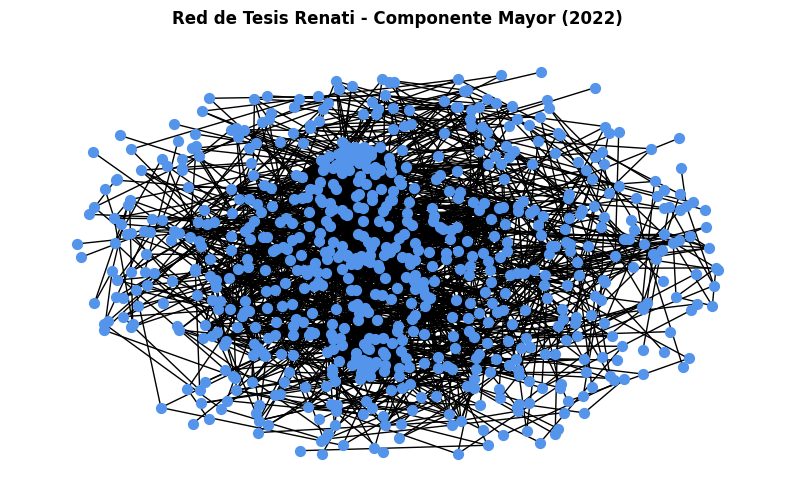

In [19]:
print(G_COMP_MAX)

print("---------------------------------------------------------------")
cluster_g = nx.average_clustering(G_COMP_MAX)
short_path_g = nx.average_shortest_path_length(G_COMP_MAX)
print("Coeficiente de clustering:", cluster_g)
print("Distancia promedio:", short_path_g)
print("\n")

plt.figure(figsize=(10, 6))
plt.axis("off")

nx.draw(G_COMP_MAX, pos, node_size=50, node_color="#5495EB")

plt.title("Red de Tesis Renati - Componente Mayor (2022)", weight="bold")
plt.show()

Graph with 714 nodes and 3962 edges


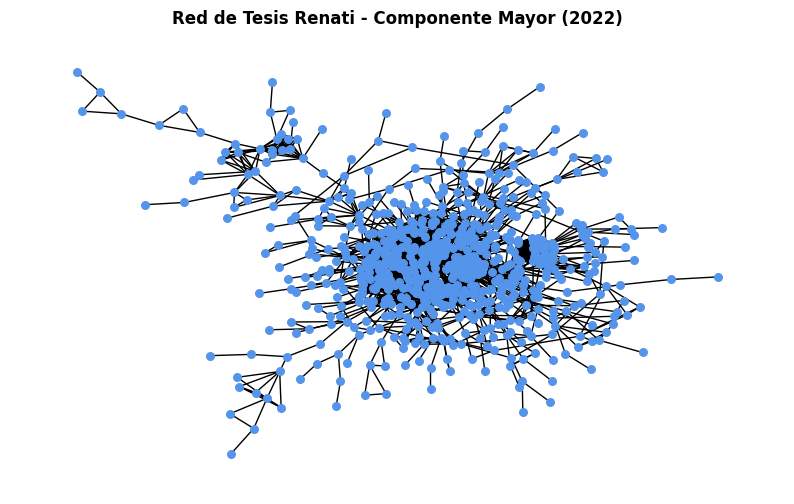

In [73]:
print(G_COMP_MAX)

plt.figure(figsize=(10, 6))
plt.axis("off")

nx.draw(G_COMP_MAX, pos_kamada, node_size=30, node_color="#5495EB")

plt.title("Red de Tesis Renati - Componente Mayor (2022)", weight="bold")
plt.show()

# Métricas de la Red

## Métricas básicas

In [25]:
def metrics(G):
    N = G.number_of_nodes()
    L = G.number_of_edges()

    print("Cantidad de Nodos:", N)
    print("Cantidad de Conexiones:", L)

    ## Grado promedio de los nodos
    ## 2*L/N
    avg_degree = 2*L / N
    print("Grado Promedio de los Nodos:", avg_degree)

    ## obtención de la distancia máxima (diámetro)
    diam = nx.diameter(G)
    print("Diámetro del Grafo:", diam)

    ## DENSIDAD
    #la proporción de aristas existentes en el grafo, sobre la cantidad potencial de aristas
    # L/max
    dens = nx.density(G)
    print("Densidad del Grafo:", dens)

    ## CLUSTERING O AGRUPAMIENTO
    #calcular el coeficiente de clustering promedio a todos los nodos desde el nodo 0
    coef_agrup = nx.average_clustering(G)
    print("Coeficiente de Agrupamiento:", coef_agrup)

    ## Promedio de Camino Más Corto
    short_path = nx.average_shortest_path_length(G)
    print("Distancia Promedio:", short_path)

metrics(G_COMP_MAX)

Cantidad de Nodos: 714
Cantidad de Conexiones: 3962
Grado Promedio de los Nodos: 11.098039215686274
Diámetro del Grafo: 21
Densidad del Grafo: 0.015565272392266865
Coeficiente de Agrupamiento: 0.5558881887774149
Distancia Promedio: 5.287863251892622


## Centralidad de Nodos

In [62]:
#Métricas de centralidad: Centralidad|| Intermediación || Cercanía
degree_centrality = nx.degree_centrality(G_COMP_MAX)
betweenness_centrality = nx.betweenness_centrality(G_COMP_MAX)
closeness_centrality = nx.closeness_centrality(G_COMP_MAX)

#3 nodos más relevantes para cada métrica de centralidad
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print("Los 3 nodos más relevantes según la métrica de centralidad de grado son:")
for node, centrality in top_degree:
    print(f"Nodo: {node}, Centralidad de grado: {centrality}")

print("\n")
print("Los 3 nodos más relevantes según la métrica de centralidad de intermediación son:")
for node, centrality in top_betweenness:
    print(f"Nodo: {node}, Centralidad de intermediación: {centrality}")

print("\n")
print("Los 3 nodos más relevantes según la métrica de centralidad de cercanía son:")
for node, centrality in top_closeness:
    print(f"Nodo: {node}, Centralidad de cercanía: {centrality}")

Los 3 nodos más relevantes según la métrica de centralidad de grado son:
Nodo: 3351450, Centralidad de grado: 0.11079943899018233
Nodo: 3356391, Centralidad de grado: 0.10378681626928471
Nodo: 3356406, Centralidad de grado: 0.10098176718092566


Los 3 nodos más relevantes según la métrica de centralidad de intermediación son:
Nodo: 3411437, Centralidad de intermediación: 0.1368509173720555
Nodo: 3423533, Centralidad de intermediación: 0.13369607985822735
Nodo: 3356239, Centralidad de intermediación: 0.11950388974581413


Los 3 nodos más relevantes según la métrica de centralidad de cercanía son:
Nodo: 3356391, Centralidad de cercanía: 0.30288870008496177
Nodo: 3351450, Centralidad de cercanía: 0.30122517955217576
Nodo: 3356406, Centralidad de cercanía: 0.2977035490605428


In [69]:
for n in ["3351450", "3356391", "3356406", "3411437", "3423533", "3356239", "3356391", "3351450", "3356406"]:
    print("------------------------------------------------------------------------")
    print(n, "-->", len(list(G_COMP_MAX.neighbors(n))), "-->", G_COMP_MAX.nodes()[n])

------------------------------------------------------------------------
3351450 --> 79 --> {'title': 'Relación del índice de alimentación saludable y de la actividad física con la salud mental durante confinamiento-COVID 19 en universitarios, Lima - 2021', 'year': 2022, 'university': 'Universidad Nacional Mayor de San Marcos', 'right': 'openAccess', 'discipline': 'Nutrición'}
------------------------------------------------------------------------
3356391 --> 74 --> {'title': 'Principales beneficios de la implementación a la modalidad virtual en el proceso de enseñanza – aprendizaje de los estudiantes de enfermería en el marco de la pandemia COVID – 19, Lima 2022', 'year': 2022, 'university': 'Universidad Nacional Mayor de San Marcos', 'right': 'openAccess', 'discipline': 'Enfermería'}
------------------------------------------------------------------------
3356406 --> 72 --> {'title': 'Actitud hacia la muerte en época de pandemia en estudiantes de enfermería de una universidad públic

79

In [68]:
79/714

0.11064425770308123

Graph with 714 nodes and 3962 edges


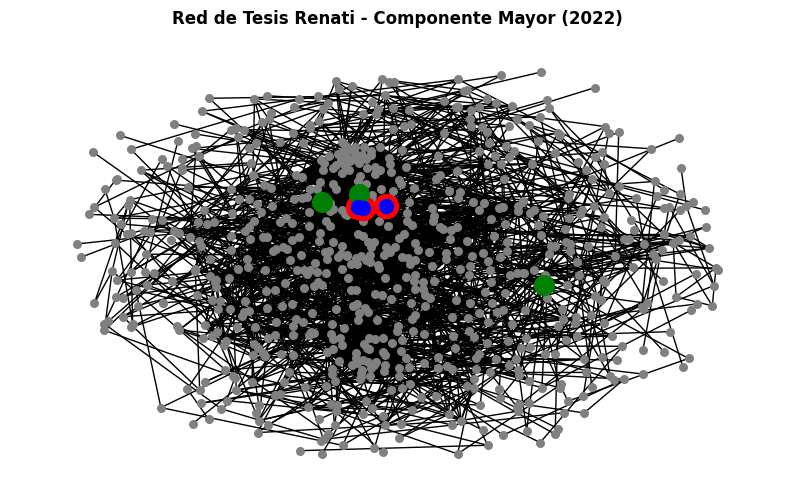

In [64]:
print(G_COMP_MAX)

plt.figure(figsize=(10, 6))
plt.axis("off")

nx.draw(G_COMP_MAX, pos, node_size=30, node_color="grey")
nx.draw_networkx_nodes(G_COMP_MAX, pos=pos, nodelist=[n[0] for n in top_degree], node_color=["red"], node_size=300)
nx.draw_networkx_nodes(G_COMP_MAX, pos=pos, nodelist=[n[0] for n in top_betweenness], node_color="green", node_size=200)
nx.draw_networkx_nodes(G_COMP_MAX, pos=pos, nodelist=[n[0] for n in top_closeness], node_color="blue", node_size=100)

plt.title("Red de Tesis Renati - Componente Mayor (2022)", weight="bold")
plt.show()

# Propiedades de Mundo Pequeño

## Modelo Watts-Strogatz (Small World)

In [ ]:
n = G_COMP_MAX.number_of_nodes()
np.log(n)

6.570882962339584

Graph with 20 nodes and 40 edges
---------------------------------------------------------------
Coeficiente de clustering: 0.44833333333333336
Distancia promedio: 2.642105263157895




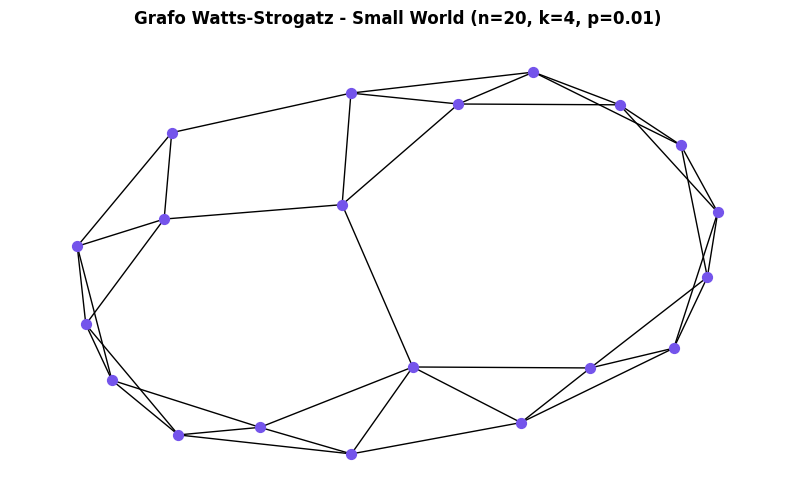

In [ ]:
n = 20
k = 4
p = 0.01

sw_graph = nx.watts_strogatz_graph(n, k , p)
print(sw_graph)

print("---------------------------------------------------------------")
cluster_sw = nx.average_clustering(sw_graph)
short_path_sw = nx.average_shortest_path_length(sw_graph)
print("Coeficiente de clustering:", cluster_sw)
print("Distancia promedio:", short_path_sw)
print("\n")

plt.figure(figsize=(10, 6))
plt.axis("off")

nx.draw(sw_graph, node_size=50, node_color="#7454EB")

plt.title("Grafo Watts-Strogatz - Small World (n={}, k={}, p={})".format(n, k, p), weight="bold")
plt.show()

## Modelo Erdos-Renyi (Grafo Aleatori)

In [ ]:
np.log(G_COMP_MAX.number_of_nodes()) / G_COMP_MAX.number_of_nodes()

0.009202917314201099

Graph with 714 nodes and 2577 edges
---------------------------------------------------------------
Coeficiente de clustering: 0.009413714295078594
Distancia promedio: 3.5445881017203513




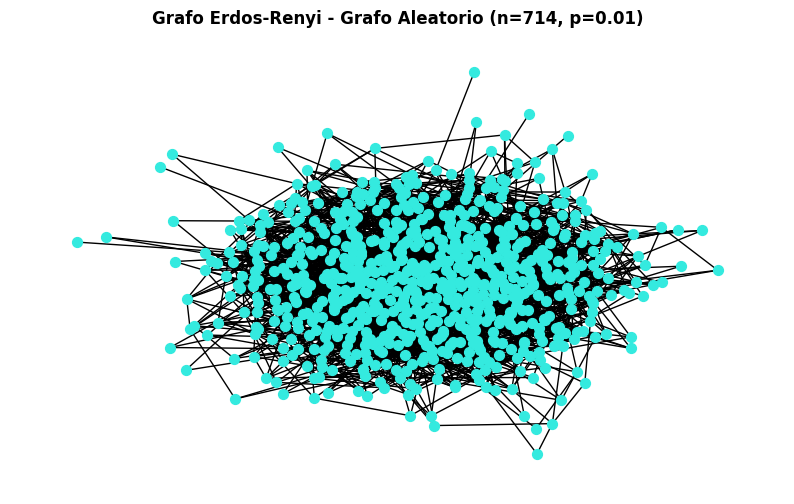

In [ ]:
n = G_COMP_MAX.number_of_nodes()
m = G_COMP_MAX.number_of_edges()
p = 2*m / (n*(n-1))
p = 0.01

er_graph = nx.erdos_renyi_graph(n, p)
print(er_graph)

print("---------------------------------------------------------------")
cluster_er = nx.average_clustering(er_graph)
short_path_er = nx.average_shortest_path_length(er_graph)
print("Coeficiente de clustering:", cluster_er)
print("Distancia promedio:", short_path_er)
print("\n")

plt.figure(figsize=(10, 6))
plt.axis("off")

nx.draw(er_graph, node_size=50, node_color="#34EADF")

plt.title("Grafo Erdos-Renyi - Grafo Aleatorio (n={}, p={})".format(n, round(p, 4)), weight="bold")
plt.show()

## Comparación de métricas

In [ ]:
etiquetas = {indice: nodo for indice, nodo in enumerate(G_COMP_MAX)}
er_graph = nx.relabel_nodes(er_graph, etiquetas)
print(er_graph)

Graph with 714 nodes and 2577 edges


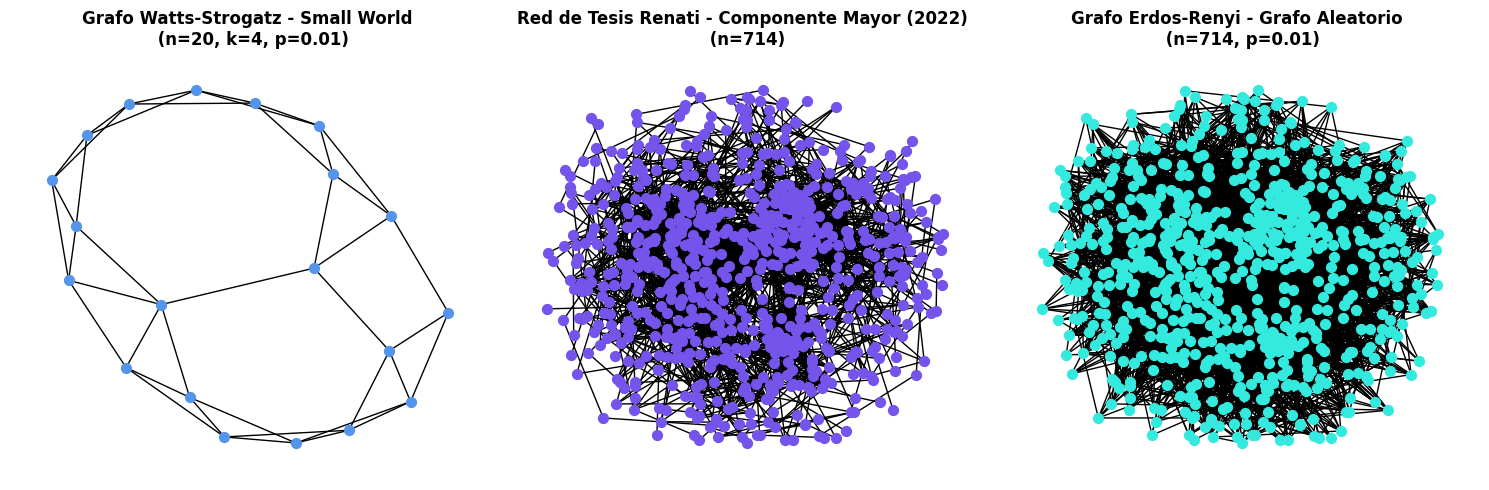

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

nx.draw(sw_graph, node_size=50, node_color="#5495EB", ax=ax1)
nx.draw(G_COMP_MAX, node_size=50, pos=pos, node_color="#7454EB", ax=ax2)
nx.draw(er_graph, node_size=50, pos=pos, node_color="#34EADF", ax=ax3)

ax1.set_title("Grafo Watts-Strogatz - Small World \n (n=20, k=4, p=0.01)", weight="bold")
ax2.set_title("Red de Tesis Renati - Componente Mayor (2022) \n (n=714)", weight="bold")
ax3.set_title("Grafo Erdos-Renyi - Grafo Aleatorio \n (n=714, p=0.01)", weight="bold")

plt.tight_layout()
plt.show()

In [ ]:
data = {"modelo":["Watts-Strogatz", "Red de Tesis", "Erdos-Renyi"],
        "coeficiente_clustering":[cluster_sw, cluster_g, cluster_er],
        "distancia_promedio":[short_path_sw, short_path_g, short_path_er]}

df_metrics = pd.DataFrame(data).round(4)
df_metrics

,modelo,coeficiente_clustering,distancia_promedio
0,Watts-Strogatz,0.4483,2.6421
1,Red de Tesis,0.5559,5.2879
2,Erdos-Renyi,0.0094,3.5446


# Grafos Aleatorios

Graph with 714 nodes and 2514 edges


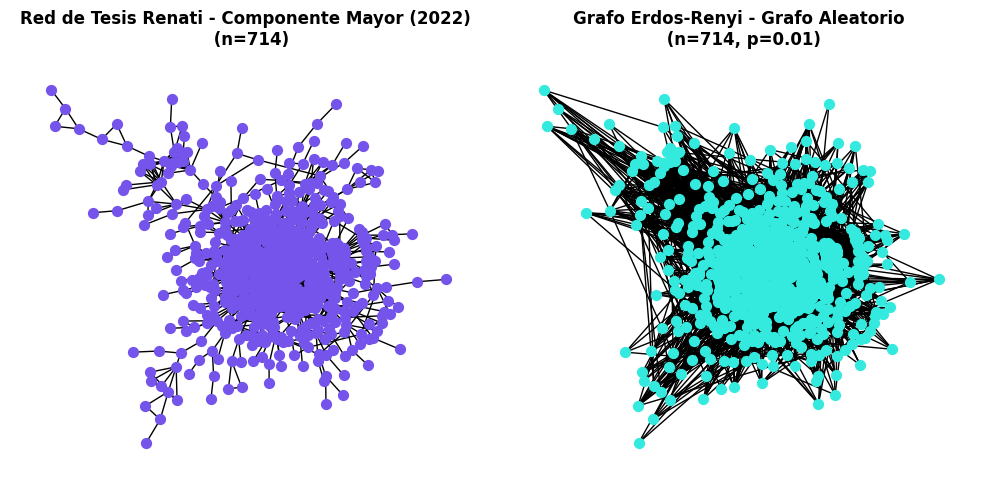

In [81]:
n = G_COMP_MAX.number_of_nodes()
m = G_COMP_MAX.number_of_edges()
p = 2*m / (n*(n-1))
p = 0.01

er_graph = nx.erdos_renyi_graph(n, p)
print(er_graph)

etiquetas = {indice: nodo for indice, nodo in enumerate(G_COMP_MAX)}
er_graph = nx.relabel_nodes(er_graph, etiquetas)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

nx.draw(G_COMP_MAX, node_size=50, pos=pos_kamada, node_color="#7454EB", ax=ax1)
nx.draw(er_graph, node_size=50, pos=pos_kamada, node_color="#34EADF", ax=ax2)

ax1.set_title("Red de Tesis Renati - Componente Mayor (2022) \n (n=714)", weight="bold")
ax2.set_title("Grafo Erdos-Renyi - Grafo Aleatorio \n (n=714, p=0.01)", weight="bold")

plt.tight_layout()
plt.show()

In [82]:
metrics(er_graph)

Cantidad de Nodos: 714
Cantidad de Conexiones: 2514
Grado Promedio de los Nodos: 7.042016806722689
Diámetro del Grafo: 7
Densidad del Grafo: 0.009876601411953281
Coeficiente de Agrupamiento: 0.009812468110787429
Distancia Promedio: 3.5916610683544103


# Detección de Comunidades

In [ ]:
!pip install cdlib

In [99]:
from networkx.algorithms import community as nx_comm
from cdlib import algorithms
from cdlib import viz
from cdlib import evaluation
from community import community_louvain

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'leidenalg', 'graph_tool', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


In [120]:
lp_com = nx_comm.label_propagation_communities(SUB_G)
lp_mod = nx_comm.modularity(SUB_G, lp_com)
lp_mod

0.6420783828687925

In [158]:
gn_com = algorithms.girvan_newman(G_COMP_MAX, level=20)
gn_com_mod = gn_com.modularity_density()
gn_com_mod

FitnessResult(min=None, max=None, score=70.79918714371048, std=None)

In [149]:
lp_com = algorithms.label_propagation(G_COMP_MAX)
lp_com_mod = lp_com.modularity_density()
lp_com_mod

FitnessResult(min=None, max=None, score=143.57663275009952, std=None)

In [150]:
louvain_com = algorithms.louvain(G_COMP_MAX)
louvain_com_mod = louvain_com.modularity_density()
louvain_com_mod

FitnessResult(min=None, max=None, score=111.04401174992772, std=None)

In [168]:
evaluation.normalized_mutual_information(louvain_com, lp_com)

MatchingResult(score=0.7054609203519053, std=None)

In [169]:
evaluation.normalized_mutual_information(louvain_com, gn_com)

MatchingResult(score=0.6124943179190481, std=None)

In [170]:
evaluation.normalized_mutual_information(gn_com, lp_com)

MatchingResult(score=0.5991881549290015, std=None)

In [145]:
pos = nx.spring_layout(G_COMP_MAX)

21


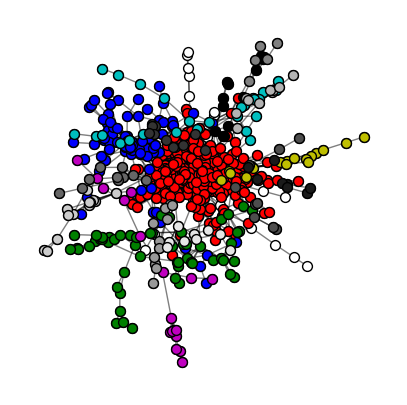

In [159]:
print(len(gn_com.communities))
viz.plot_network_clusters(G_COMP_MAX, gn_com, pos, node_size=50, figsize=(5, 5))
plt.show()

93


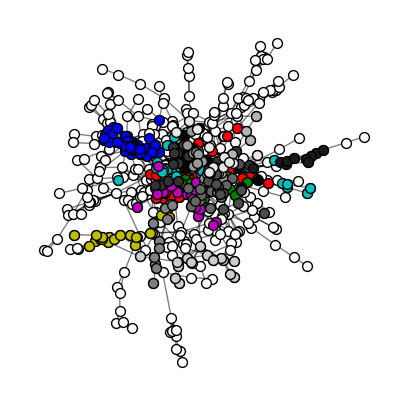

In [153]:
print(len(lp_com.communities))
viz.plot_network_clusters(G_COMP_MAX, lp_com, pos, node_size=50, figsize=(5, 5))
plt.show()

21


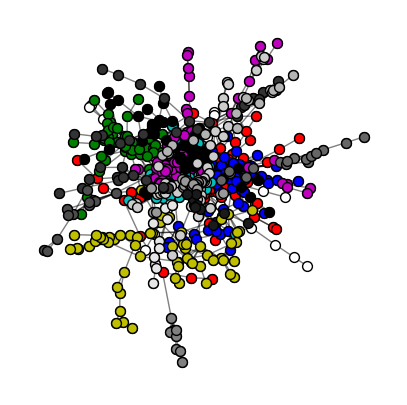

In [154]:
print(len(louvain_com.communities))
viz.plot_network_clusters(G_COMP_MAX, louvain_com, pos, node_size=50, figsize=(5, 5))
plt.show()